In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
config_results_pickle = "config_results-1575623151.708932.pickle"
file = open(config_results_pickle, 'rb')
config_results = pickle.load(file)
file.close()

In [3]:
base_results = list(filter(lambda x: x[0]["dataset"] == "base", config_results))
doc2vec_results = list(filter(lambda x: x[0]["dataset"] == "doc2vec", config_results))
basicname_results = list(filter(lambda x: x[0]["dataset"] == "basicname", config_results))

In [4]:
def get_best_results(results, n=5):
    r = sorted(results, key=lambda x: x[1]["accuracy"], reverse=True)
    return r[:n]

get_best_results(config_results)

[({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 8,
   'layer_sizes': (5,),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.6056017238734026, 'accuracy': 0.6639598}),
 ({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 8,
   'layer_sizes': (5, 5, 5),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.6071849831559861, 'accuracy': 0.66392976}),
 ({'one_hot': 'both',
   'dataset': 'base',
   'epochs': 8,
   'layer_sizes': (10, 10),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.6052409970472442, 'accuracy': 0.66365904}),
 ({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 8,
   'layer_sizes': (10, 10, 10),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.6051684661127972, 'accuracy': 0.66353875}),
 ({'one_hot': 'both',
   'dataset': 'doc2vec',
   'epochs': 8,
   'layer_sizes': (5, 5),
   'dropout': None,
   'lr': 0.01},
  {'loss': 0.6038169588514614, 'accuracy': 0.66314775})]

In [5]:
def plot_results(results, dataset):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title("DATASET: %s --- comparison of NN model complexity with accuracy on validation data" % dataset)
    ax.set_xlabel("nodes per layer")
    ax.set_ylabel("accuracy on validation data")
    
    colors = [("red", "orange"), ("blue", "cyan"), ("green", "lime")]
    layer_counts = [1, 2, 3]
    dropouts = [None, 0.3]
    for i in range(len(layer_counts)):
        layer_count = layer_counts[i]
        for j in range(len(dropouts)):
            dropout = dropouts[j]
            color = colors[i][j]
            
            relevant_data = list(filter(lambda x: len(x[0]["layer_sizes"]) == layer_count and x[0]["dropout"] == dropout, results))
            X = list(map(lambda x: x[0]["layer_sizes"][0], relevant_data))
            y = list(map(lambda x: x[1]["accuracy"], relevant_data))
            ax.plot(X, y, label="%s layers with %s dropout on each" % (layer_count, dropout), color=color)
    ax.legend()

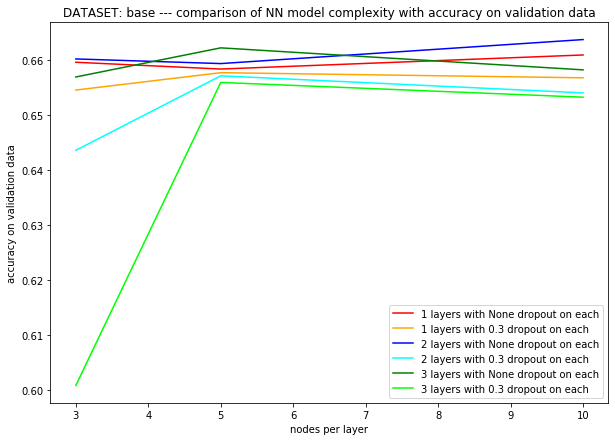

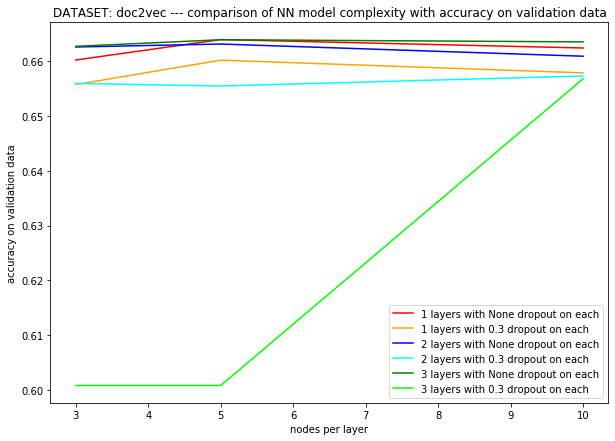

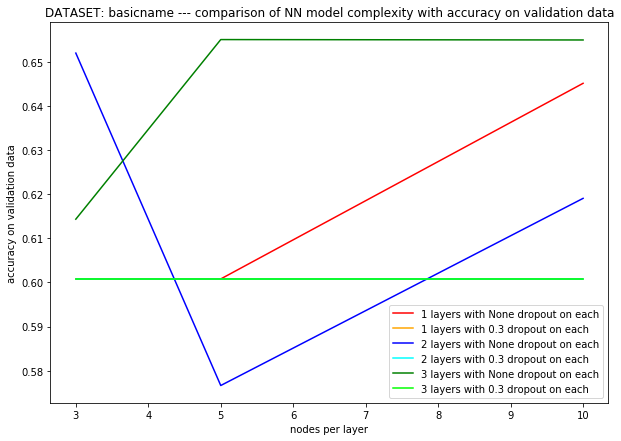

In [6]:
plot_results(base_results, "base")
plot_results(doc2vec_results, "doc2vec")
plot_results(basicname_results, "basicname")

In [7]:
one_hot_demonstration=[({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': False},
  {'accuracy': 0.60080004, 'loss': 0.6700640892103356}),
 ({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': 'main'},
  {'accuracy': 0.6338236, 'loss': 0.6389283972193938}),
 ({'dataset': 'base',
   'dropout': None,
   'epochs': 3,
   'layer_sizes': (5,),
   'lr': 0.01,
   'one_hot': 'both'},
  {'accuracy': 0.65650094, 'loss': 0.6132693482885189})]

<BarContainer object of 3 artists>

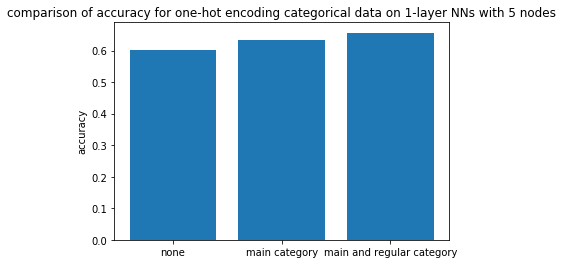

In [8]:
fig, ax = plt.subplots()
ax.set_title("comparison of accuracy for one-hot encoding categorical data on 1-layer NNs with 5 nodes")
ax.set_ylabel("accuracy")
ax.bar(["none", "main category", "main and regular category"],
       list(map(lambda x: x[1]["accuracy"], one_hot_demonstration)))